In [39]:
# Imports needed in every section
import pandas as pd
#import testing_scripts.constants as constants
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, confusion_matrix

#Read Data
folder_name = "../sample_input_data/supplementary_materials_output_data/"

doordash_table1_df = pd.read_csv("../Table1_Experimental_Modified_Resumes/Scores/DoorDashPMScores.csv")
doordash100 = pd.read_csv("../Figure1_100Samples/Scores/doordash_job_description.csv")

google_table1_df = pd.read_csv("../Table1_Experimental_Modified_Resumes/Scores/GoogleUX_Scores.csv")
google100 = pd.read_csv("../Figure1_100Samples/Scores/google_ux_job_description.csv")


## Motivating Figures (Section 3)

### Figure 1-A (Resume Scores Across Sequential LLM Manipulations)

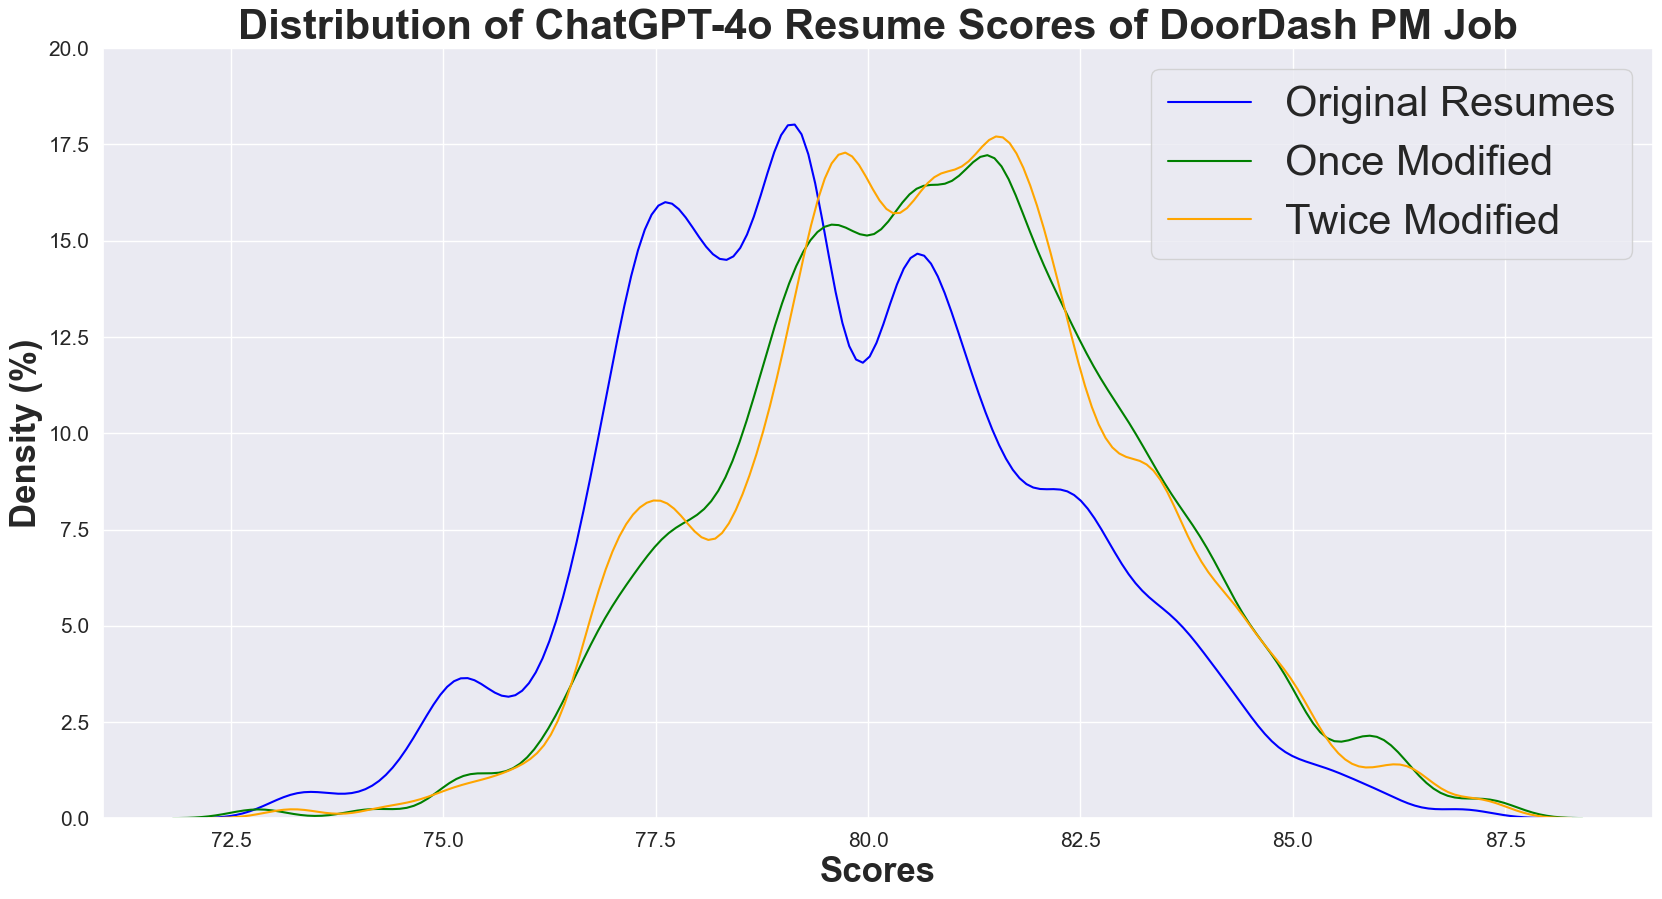

In [40]:
sns.set_theme(rc={'figure.figsize':(20,10)})
first_three_colors = ['blue', 'green', 'orange']

fig = sns.kdeplot(doordash_table1_df['CVDoorDash PM Score'], bw_adjust=0.5, color=first_three_colors[0])  # bw_adjust adjusts the smoothness
fig = sns.kdeplot(doordash_table1_df['Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, color=first_three_colors[1])
fig = sns.kdeplot(doordash_table1_df['Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score'], bw_adjust=0.5, color=first_three_colors[2])
plt.title('Distribution of ChatGPT-4o Resume Scores of DoorDash PM Job', fontsize=30, fontweight="bold")
plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'], fontsize=30)
#plt.grid()
plt.savefig('chatgpt1.png')
plt.show()

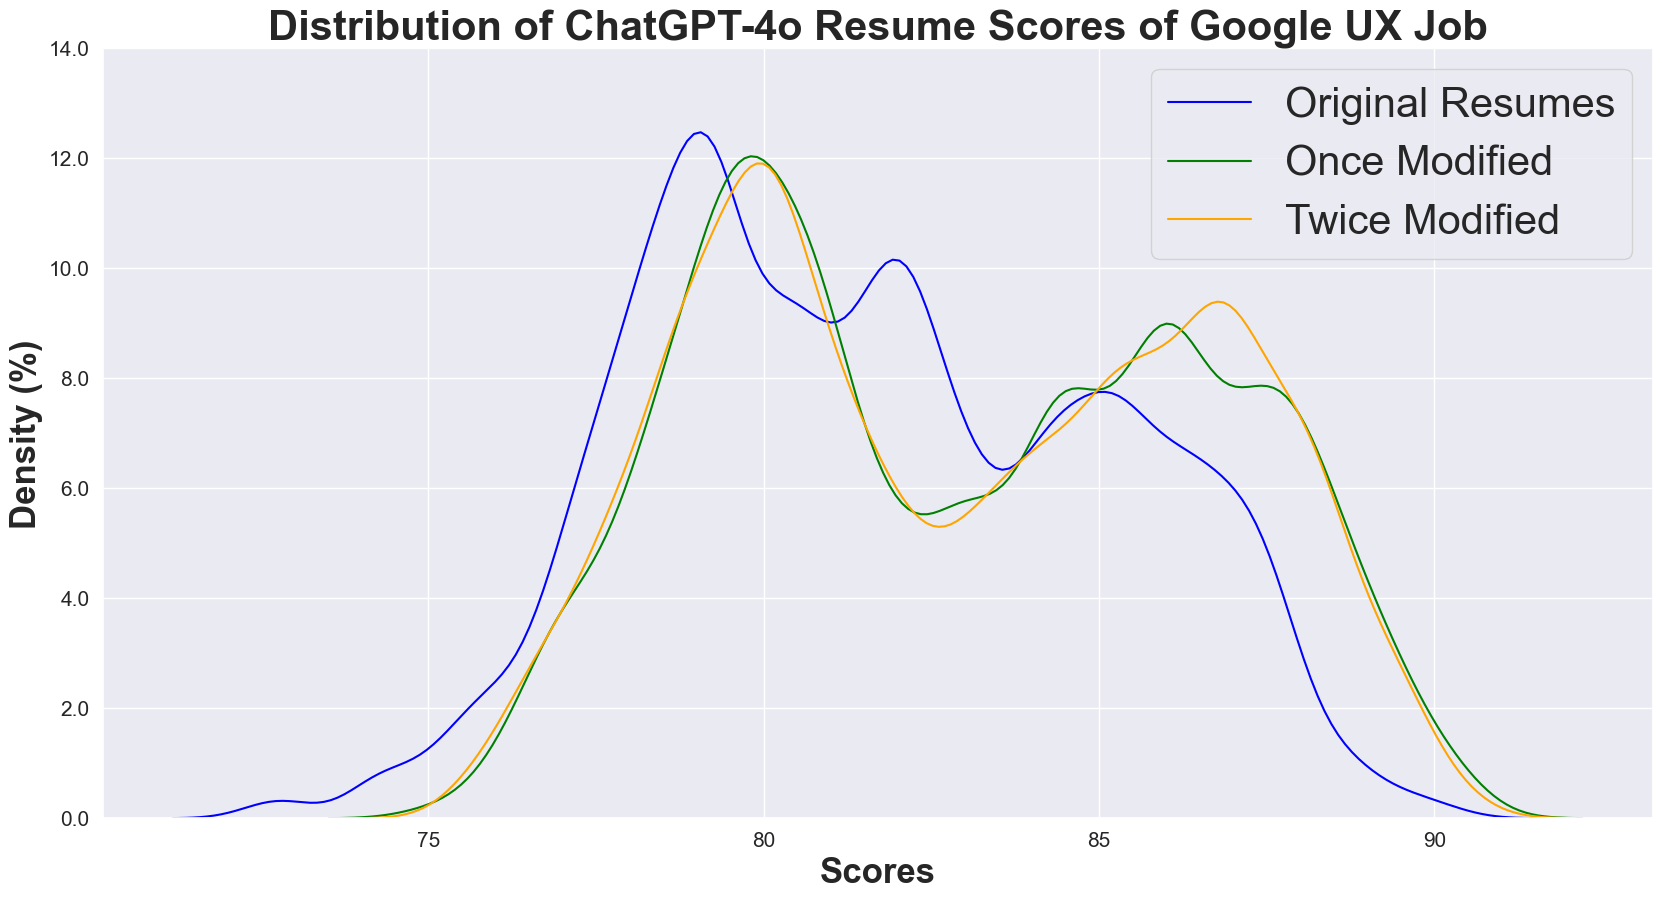

In [41]:
sns.set_theme(rc={'figure.figsize':(20,10)})
first_three_colors = ['blue', 'green', 'orange']

fig = sns.kdeplot(google_table1_df['CVGoogle_UX Score'], bw_adjust=0.5, color=first_three_colors[0])  # bw_adjust adjusts the smoothness
fig = sns.kdeplot(google_table1_df['Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score'], bw_adjust=0.5, color=first_three_colors[1])
fig = sns.kdeplot(google_table1_df['Twice GPT-4o Google_UX Score'], bw_adjust=0.5, color=first_three_colors[2])
plt.title('Distribution of ChatGPT-4o Resume Scores of Google UX Job', fontsize=30, fontweight="bold")
plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.legend(['Original Resumes', 'Once Modified', 'Twice Modified'], fontsize=30)
#plt.grid()
plt.savefig('chatgpt1.png')
plt.show()

### Figure 1-B (Resume Scores over Different LLM Manipulations)

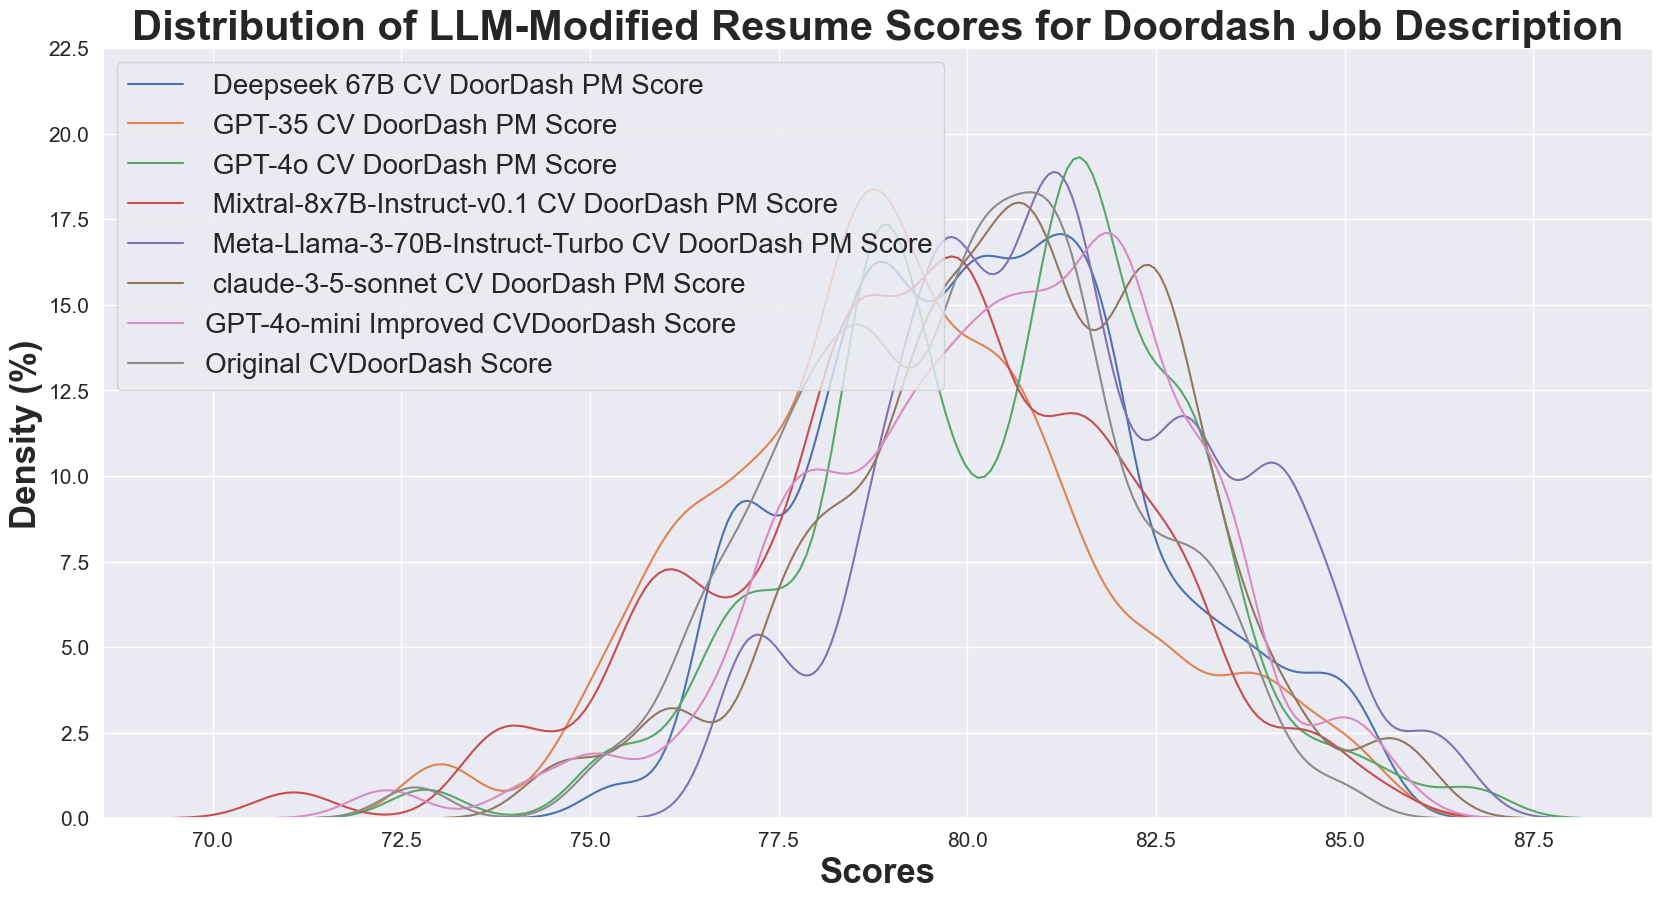

In [42]:
leg = []
for i in doordash100.columns:
    if 'Score' in i and 'Twice' not in i:
        fig = sns.kdeplot(doordash100[i], bw_adjust=0.5)
        leg.append(i.replace(' Conversation-Improved', ''))

plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.title('Distribution of LLM-Modified Resume Scores for Doordash Job Description', fontsize=30,fontweight="bold")
plt.legend(leg, fontsize=20)
plt.show()

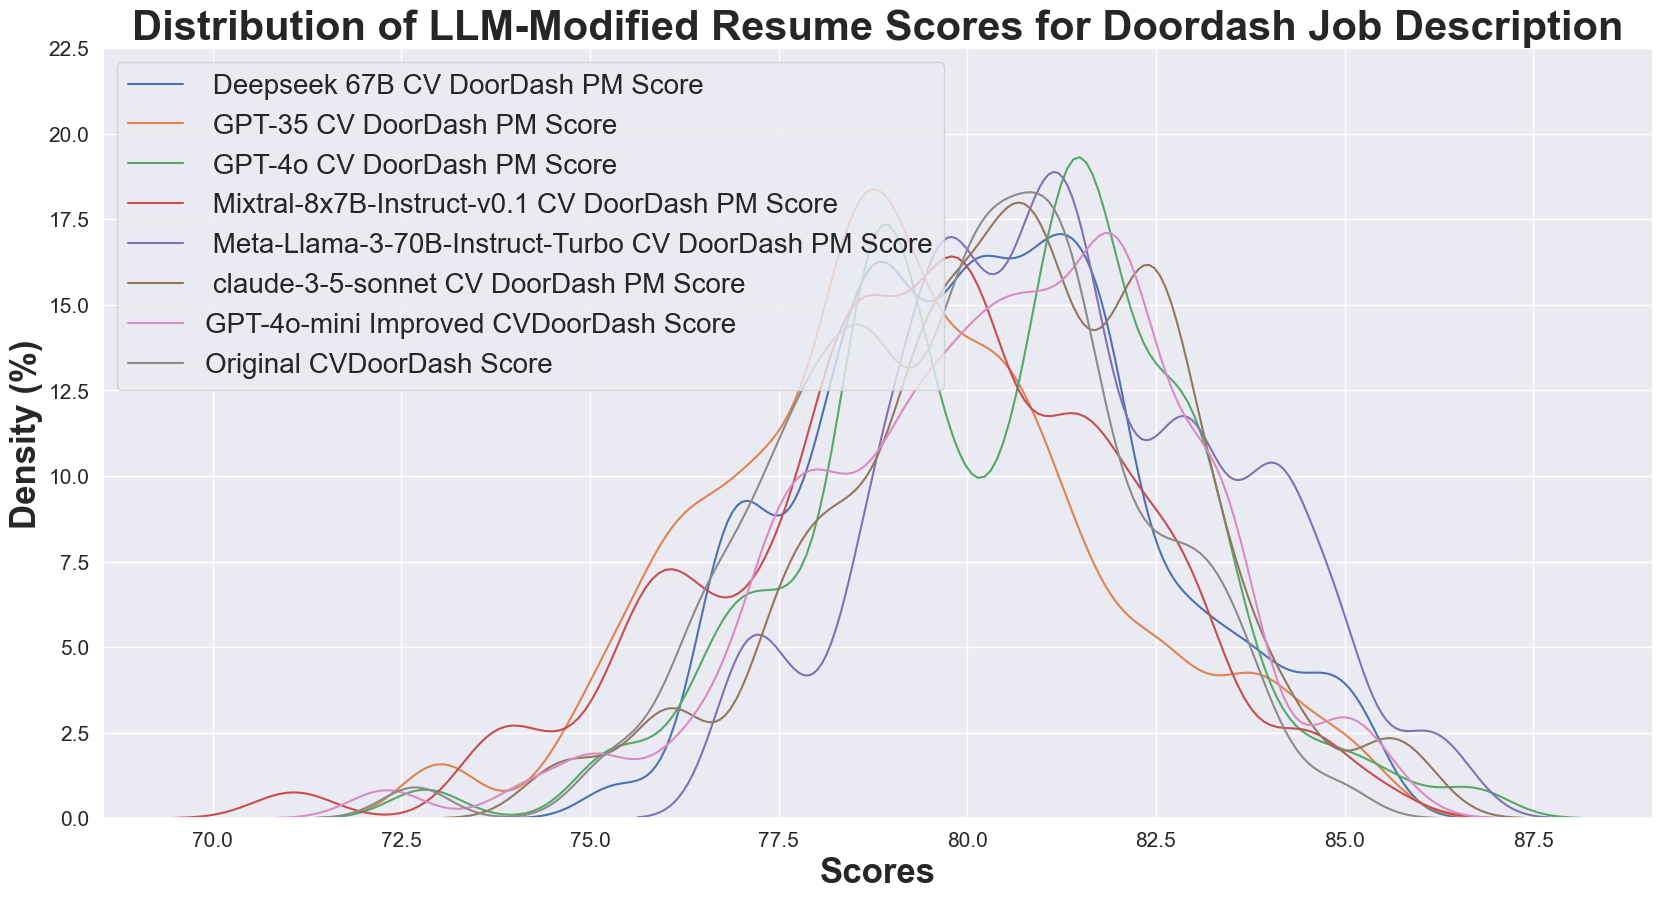

In [43]:
leg = []
for i in doordash100.columns:
    if 'Score' in i and 'Twice' not in i:
        fig = sns.kdeplot(doordash100[i], bw_adjust=0.5)
        leg.append(i.replace(' Conversation-Improved', ''))

plt.yticks(fig.get_yticks(), np.round(fig.get_yticks() * 100, 2))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Scores', fontsize=25, fontweight="bold")
plt.ylabel('Density (%)', fontsize=25, fontweight="bold")
plt.title('Distribution of LLM-Modified Resume Scores for Doordash Job Description', fontsize=30,fontweight="bold")
plt.legend(leg, fontsize=20)
plt.show()

## Experimental Results with Binary Classification(See Section 8 of Paper)

In [44]:
google_table2_df = google_table1_df.copy()

In [45]:
google_table2_df['Will Manipulate'] = 1 - google_table1_df['Will Manipulate']

In [46]:
google_table2_df.head()

,Unnamed: 0,Twice GPT-4o Google_UX Score,Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score,Modified GPT-3.5 Google_UX Score,CVGoogle_UX Score,Modified GPT-4o of GPT-3.5-turbo Google_UX Score,Modified GPT-4o of GPT-4o-mini Google_UX Score,Modified GPT-4o-mini Google_UX Score,UX True Label,Will Manipulate
0,0,84.740,84.285,84.168,84.209,84.903,84.458,83.868,1,0
1,1,84.597,83.479,85.658,84.209,86.606,84.199,84.344,1,0
2,2,87.733,87.623,87.486,85.607,88.444,86.448,87.947,1,0
3,3,84.082,82.527,83.467,80.387,84.231,84.322,81.877,1,0
4,4,88.951,88.454,87.540,88.592,89.418,88.332,87.550,1,0


In [47]:
google_table1_df.head()

,Unnamed: 0,Twice GPT-4o Google_UX Score,Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score,Modified GPT-3.5 Google_UX Score,CVGoogle_UX Score,Modified GPT-4o of GPT-3.5-turbo Google_UX Score,Modified GPT-4o of GPT-4o-mini Google_UX Score,Modified GPT-4o-mini Google_UX Score,UX True Label,Will Manipulate
0,0,84.740,84.285,84.168,84.209,84.903,84.458,83.868,1,True
1,1,84.597,83.479,85.658,84.209,86.606,84.199,84.344,1,True
2,2,87.733,87.623,87.486,85.607,88.444,86.448,87.947,1,True
3,3,84.082,82.527,83.467,80.387,84.231,84.322,81.877,1,True
4,4,88.951,88.454,87.540,88.592,89.418,88.332,87.550,1,True


In [48]:
google_table1_df.groupby(['Will Manipulate', 'UX True Label'])[['Modified GPT-4o-mini Google_UX Score', 'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score']].mean()

Modified GPT-4o-mini Google_UX Score  \
Will Manipulate UX True Label                                         
False           0                                         80.094138   
                1                                         86.025831   
True            0                                         80.145938   
                1                                         86.324169   

                               Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score  
Will Manipulate UX True Label                                                          
False           0                                                      79.741908       
                1                                                      85.888146       
True            0                                                      79.951885       
                1                                                      86.071477

In [49]:
google_table1_df.groupby(['Will Manipulate', 'UX True Label'])[['Modified GPT-4o of GPT-4o-mini Google_UX Score', 'Twice GPT-4o Google_UX Score']].mean()

Modified GPT-4o of GPT-4o-mini Google_UX Score  \
Will Manipulate UX True Label                                                   
False           0                                                   80.181031   
                1                                                   86.021662   
True            0                                                   80.229962   
                1                                                   86.328669   

                               Twice GPT-4o Google_UX Score  
Will Manipulate UX True Label                                
False           0                                 79.754900  
                1                                 85.885008  
True            0                                 79.863231  
                1                                 86.109808

In [50]:
'''
The following functions replicates how original resume scores are mapped to applicant reported 
and hirer inputted scores according to our traditional and two-ticket hiriing schemes, respectively.
'''

# Function that takes in choice amongst original & modified resume scores, and reports Applicant submitted scores. 
# These inputs are equivalent to the datapoints a traditional hiring system would consider.
groups_google = {
    0:'CVGoogle_UX Score',
    1:{
        'Input-A':'CVGoogle_UX Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-A':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-B':'Twice GPT-4o Google_UX Score',
        },
    2:{
        'Input-A':'Modified GPT-3.5 Google_UX Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-A':'Modified GPT-4o of GPT-3.5-turbo Google_UX Score',
        'Hirer-B':'Twice GPT-4o Google_UX Score',
    },
    3:{
        'Input-A':'Modified GPT-4o-mini Google_UX Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score',
        'Hirer-A':'Modified GPT-4o of GPT-4o-mini Google_UX Score',
        'Hirer-B':'Twice GPT-4o Google_UX Score',
    },
}
groups_doordash = {
    0:'CVDoorDash PM Score',
    1:{
        'Input-A':'CVDoorDash PM Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-A':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
        },
    2:{
        'Input-A':'GPT-3.5 Improved CVDoorDash PM Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-A':'GPT-4o Conversation Improved on GPT-3.5 Improved CVDoorDash PM Score',
        'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
    },
    3:{
        'Input-A':'GPT-4o-mini Improved CVDoorDash PM Score',
        'Input-B':'Cleaned GPT-4o Conversation-Improved CVDoorDash PM Score',
        'Hirer-A':'GPT-4o Conversation Improved on GPT-4o-mini Improved CVDoorDash PM Score',
        'Hirer-B': 'Cleaned Twice GPT-4o Conversation-Improved CVDoorDash PM Score',
    },
}

#true_label = 'True Label'
true_label = 'UX True Label'
def map_input_score(row, group, groupss):
    if row['Will Manipulate']:
        #If applicant is manipulating, will report better performing score amongst original and modified resume.
        return max(row[groupss[group]['Input-B']], row[groupss[0]])
    else:
        #If application is not manipulating, applicant can only report original score.
        return max(row[groupss[group]['Input-A']], row[groupss[0]])

# Function that takes in choice amongst original & modified resume scores, and reports Hirer inputted scores. Considers a modified version against the submitted resume.
def map_hirer_score(row, group, groupss):
    if row['Will Manipulate']:
        #If applicant has manipulated previously, take maximum of submitted score and 'twice' modified resume score.
        return max(row[groupss[group]['Input-B']], row[groupss[group]['Hirer-B']])
    else:
        #If applicant has not manipulated previously, take maximum of submitted score and 'once' modified resume score.
        return max(row[groupss[group]['Input-A']], row[groupss[group]['Hirer-A']])

In [51]:
#Group-No corresponds to an assigment of LLMs to P and U groups in our paper (See groups_doordash and groups_google more ref).DS_Store
groupno=1
# df=doordash_table1_df
# assigned_group_dict = groups_doordash
df=google_table2_df
assigned_group_dict = groups_google
input_score_col = 'input_score_'+str(groupno)
hirer_score_col = 'hirer_score_'+str(groupno)
# Assuming your DataFrame is named 'df'
df[input_score_col] = df.apply(map_input_score, group=groupno, groupss = assigned_group_dict, axis=1)
df[hirer_score_col] = df.apply(map_hirer_score, group=groupno, groupss = assigned_group_dict, axis=1)
# Check statistics
df.groupby(true_label)[[input_score_col, hirer_score_col]].describe()

input_score_1                                                  \
                      count       mean       std     min       25%      50%   
UX True Label                                                                 
0                     260.0  79.614388  1.892169  74.330  78.32925  79.5295   
1                     260.0  85.246719  2.444587  75.927  83.79950  85.4850   

                                hirer_score_1                               \
                    75%     max         count       mean       std     min   
UX True Label                                                                
0              80.75675  85.506         260.0  80.062165  1.798252  75.705   
1              87.14700  90.170         260.0  86.182542  2.154525  75.927   

                                                   
                    25%     50%       75%     max  
UX True Label                                      
0              78.86525  80.138  81.10950  87.151  
1              84.70800  86.193  87.73675  90.621

In [52]:
'''
The following Functions help us calculate optimal thresholds according to our "No False Positives Objective" on the training sets.
in each iteration of our sampling test to generate an estimate for the our TPR and disparity improvements across Traditional and "Two-Ticket" Hiring.
'''

#Function that calculates the threshold according to an approximation our 'no-False Positives" objective.
#In other words, we want to find a threshold that maximizes the TPR but sets the FPR arbitrarily small (not zero, but sufficiently close).
def set_threshold_min_fpr(scores, labels, min_tpr=0.01):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)

    # Find the index where TPR is just above min_tpr
    valid_idx = np.where(tpr >= min_tpr)[0]
    if len(valid_idx) > 0:
        best_idx = valid_idx[0]
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]
    else:
        # If no threshold gives TPR >= min_tpr, return the threshold with highest TPR
        best_idx = np.argmax(tpr)
        return thresholds[best_idx], fpr[best_idx], tpr[best_idx]

#Function that calculates the threshold according to an approximation our 'no-False Positives" objective.
#In other words, we want to find a threshold that maximizes the TPR but sets the FPR to zero.
def set_threshold_zero_fpr(scores, labels):
    # Ensure scores and labels are numpy arrays
    scores = np.array(scores)
    labels = np.array(labels)

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(labels, scores)
    #print(fpr, tpr, thresholds)
    # Find the index of the first non-zero false positive rate
    zero_fpr_index = np.argwhere(fpr > 0)[0][0] - 1

    # Get the threshold that gives zero false positive rate
    threshold = thresholds[zero_fpr_index]

    return threshold

In [53]:
""" The following functions help us calculate our neccesary metrics on the testing set: namely, the disparity, TPR, FNR, & Accuracy."""
def calculate_disparity(y_true, y_pred, y_manipulate_label):

    y_true_a = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]
    y_pred_a = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==True]

    y_true_b = [y_true[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    y_pred_b = [y_pred[i] for i in range(len(y_manipulate_label)) if y_manipulate_label[i]==False]
    #print(np.mean(y_true_a), np.mean(y_true_b))
    #print(len(y_true_a), len(y_true_b))
    tn_a, fp_a, fn_a, tp_a = confusion_matrix(y_true_a, y_pred_a).ravel()
    tn_b, fp_b, fn_b, tp_b = confusion_matrix(y_true_b, y_pred_b).ravel()

    tpr_a = tp_a/(tp_a + fn_a)
    tpr_b = tp_b/(tp_b + fn_b)
    return tpr_a - tpr_b

def calculate_tpr_fnr_accuracy(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    tpr = tp / (tp + fn)
    fnr = fn / (fn + tp)
    accuracy = (tp+tn)/(tp+tn+fp+fn)
    return tpr, fnr, accuracy

In [54]:
num_iter = 500
results = []

#Repeat our experiment num_iter times: each experiment has resamples a new train-test split.
for i in range(num_iter):

  #Conduct the train-test split.
  train_df = df.sample(frac=0.7, random_state=i)
  test_df = df.drop(train_df.index)

  ## Calculate Traditional-Threshold with One Ticket
  threshold, train_fpr, train_tpr = set_threshold_min_fpr(train_df[input_score_col], train_df[true_label])

  #Get Predictions of Traditional Classifier on Test Set from Above Threshold. 
  test_predictions_1ticket = [1 if score >= threshold else 0 for score in test_df[input_score_col]]
  test_labels = test_df[true_label].values
  test_manipulate_label = test_df['Will Manipulate'].values

  #Get Predictions of Two Ticket Classifier on Test Set from Above Threshold. 
  test_predictions_2ticket = [1 if score >= threshold else 0 for score in test_df[hirer_score_col]]
  test_labels = test_df[true_label].values

  # Calculate Metrics of Traditional Classifier on Test Set.
  test_tpr_1ticket, test_fnr_1ticket, test_accuracy_1ticket = calculate_tpr_fnr_accuracy(test_labels, test_predictions_1ticket)
  test_disparity_1_ticket = calculate_disparity(test_labels, test_predictions_1ticket, test_manipulate_label)
  #print(f"True Positive Rate on 1 ticket test set: {test_tpr_1ticket:.2f}")

  # Calculate Metrics of Two Ticket Classifier on Test Set.
  test_tpr_2ticket, test_fnr_2ticket, test_accuracy_2ticket = calculate_tpr_fnr_accuracy(test_labels, test_predictions_2ticket)
  test_disparity_2_ticket = calculate_disparity(test_labels, test_predictions_2ticket, test_manipulate_label)

  #Append Metrics of classifiers, per iteration to our final collected data.
  results.append({
    'test_accuracy_1ticket': test_accuracy_1ticket,
    'test_accuracy_2ticket': test_accuracy_2ticket,
    #Get the pairwise difference in accuracy between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'test_accuracy_improvement': test_accuracy_2ticket-test_accuracy_1ticket,

    'test_tpr_1ticket': test_tpr_1ticket,
    'test_tpr_2ticket': test_tpr_2ticket,
    #Get the pairwise difference in TPR between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'tpr_improvement':  test_tpr_2ticket-test_tpr_1ticket,

    'test_disparity_1ticket': test_disparity_1_ticket,
    'test_disparity_2_ticket': test_disparity_2_ticket,
    #Get the pairwise difference in disparity between the two ticket and traditional classifier for each iteration (results in our paper's table).
    'disparity_decrease_2_1':  test_disparity_1_ticket-test_disparity_2_ticket,
                 
    'Threshold': threshold,
    'train_fpr': train_fpr,
    'train_tpr': train_tpr,
                  
    'test_fnr_1ticket': test_fnr_1ticket,
    'test_fnr_2ticket': test_fnr_2ticket,
    'num_accepted_1ticket': sum(test_predictions_1ticket),
    'num_accepted_2ticket': sum(test_predictions_2ticket),
    'tpr_improvement_b': True if test_tpr_2ticket - test_tpr_1ticket > 0 else False,
                  
  })

In [55]:
print('GROUP NO:', groupno)
print(assigned_group_dict[groupno])
results_df = pd.DataFrame(results)
results_df.describe()

GROUP NO: 1
{'Input-A': 'CVGoogle_UX Score', 'Input-B': 'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score', 'Hirer-A': 'Cleaned GPT-4o Conversation-Improved CVGoogle_UX Score', 'Hirer-B': 'Twice GPT-4o Google_UX Score'}


,test_accuracy_1ticket,test_accuracy_2ticket,test_accuracy_improvement,test_tpr_1ticket,test_tpr_2ticket,tpr_improvement,test_disparity_1ticket,test_disparity_2_ticket,disparity_decrease_2_1,Threshold,train_fpr,train_tpr,test_fnr_1ticket,test_fnr_2ticket,num_accepted_1ticket,num_accepted_2ticket
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.0,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.633269,0.689154,0.055885,0.269949,0.381240,0.111292,0.209595,0.009225,0.200370,87.043764,0.0,0.265041,0.730051,0.618760,21.274000,30.012000
std,0.082856,0.098380,0.024661,0.161316,0.195361,0.048440,0.082570,0.093803,0.101754,1.036847,0.0,0.156620,0.161316,0.195361,13.138347,15.883969
min,0.493590,0.538462,0.006410,0.068493,0.126761,0.012987,0.000000,-0.272145,0.014347,84.063000,0.0,0.094444,0.267442,0.123288,5.000000,9.000000
25%,0.570513,0.615385,0.038462,0.155574,0.239279,0.075000,0.151745,-0.058360,0.123942,85.592000,0.0,0.157167,0.562286,0.392130,12.000000,18.750000
50%,0.608974,0.653846,0.051282,0.197674,0.289474,0.104187,0.206781,0.013842,0.179860,87.525000,0.0,0.181319,0.802326,0.710526,15.500000,23.000000
75%,0.717949,0.801282,0.070513,0.437714,0.607870,0.144578,0.265659,0.070878,0.274412,87.823000,0.0,0.474576,0.844426,0.760721,33.000000,46.000000
max,0.858974,0.923077,0.134615,0.732558,0.876712,0.259740,0.571171,0.236011,0.489158,87.849000,0.0,0.724138,0.931507,0.873239,68.000000,81.000000
